In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import pickle
import os
import sys
from scipy import io
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
home = os.environ.get('HOME')
sys.path.append(os.path.join(home, 'Code/python/ltm'))
from flow import Paths, design
from figures.seqplots import plot_rdm
from stats.matrix import scale_zero_one

In [3]:
# plotting defaults
sns.set_style("dark");
sns.despine();
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5});
cmap = sns.color_palette("PuBuGn_d");
_figsize = (4,4)
_scale = 0.55

fig_folder = os.environ.get('HOME') + '/_pubs/seq_plos_cb/fig/source/rsa'
if not os.path.exists(fig_folder):
    os.mkdir(fig_folder)
        
ext = '.png'

<Figure size 432x288 with 0 Axes>

### Load stimulus RDMs for each model

In [4]:
Folder, _, _, _ = Paths.ExpData()
R = io.loadmat(os.path.join(Folder['Bids'], 'rdm_stim_seq.mat'))  # load MAT
# normalise IM model between 0 and 1
RDMs = [R['H'], R['N2'], R['IM']]
Title = ['Item-position', 'Item-item', 'Item mixture']

### Correlations between stimulus RDMs / model predictions

In [5]:
from scipy import stats
%matplotlib inline
# between-model correlations
M = np.zeros([len(RDMs), len(RDMs)]) # preallocate between-model corr value matrix
Scores = [] # preallocate offdiagonal scores
i_tri = np.triu_indices(R['H'].shape[0],1) # upper triangle indices
for i, r in enumerate(RDMs):
    Scores.append(r[i_tri])
    for j, q in enumerate(RDMs):
        pr = stats.pearsonr(r[i_tri], q[i_tri])
        M[i,j] = pr[0]
M

array([[ 1.        , -0.24606756,  0.51154129],
       [-0.24606756,  1.        , -0.07594085],
       [ 0.51154129, -0.07594085,  1.        ]])

<Figure size 432x288 with 0 Axes>

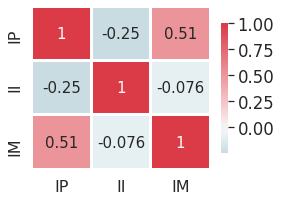

In [6]:
%matplotlib inline
sns.despine();

cmap = sns.diverging_palette(220, 10, as_cmap=True)
xt = ['IP', 'II', 'IM']

fig, ax = plt.subplots(figsize=(4, 3))
plt.rcParams.update({'font.size': 15})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(M, annot=True, ax=ax, cmap=cmap, cbar_kws={"shrink": .8},
           vmax=1, center=0, xticklabels=xt, yticklabels=xt, linewidths=2)

plot_name = 'model_btw_rdm' + ext
fig.savefig(os.path.join(fig_folder, plot_name), bbox_inches = "tight")

### Plot RDMs

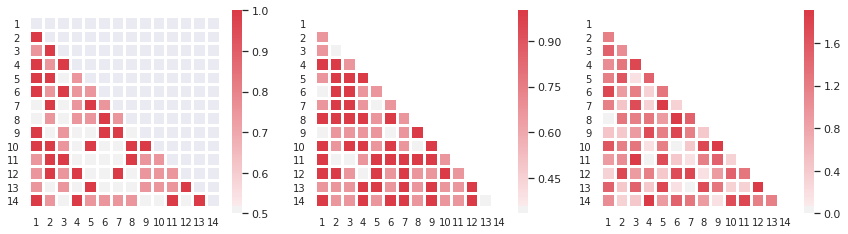

In [8]:
%autoreload plot_rdm
%matplotlib inline
#f, ax = plt.subplots(figsize=(6, 5))
fig = plt.figure(figsize=(12,6))

vmi = [1/2, 1/3, 0]

# chunks
for i, rdm in enumerate(RDMs):    
    # ax = plt.subplot(len(RDMs), 1, i+1)
    ax = plt.subplot(1, len(RDMs), i+1)
    plot_rdm(rdm, cbar=True, vmax=rdm.max(), center=vmi[i], vmin=vmi[i])
    ax.tick_params(labelsize=10)
    ax.tick_params(axis='x', labelrotation=0)

fig.tight_layout()

plot_name = 'model_rdms.pdf'
fig.savefig(os.path.join(fig_folder, plot_name), bbox_inches = "tight")

In [1]:
figure_size = 5
sns.set(style="white")
fig = plt.figure(figsize=(figure_size,figure_size-1))

D = RDMs[0]
labels = list(range(1, D.shape[1]+1))

ax = sns.heatmap(D, xticklabels=False, yticklabels=False)
ax.tick_params(labelsize=10)
ax.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)

plot_name = 'hamming_full_rdm.png'
fig.savefig(os.path.join(fig_folder, plot_name), bbox_inches = "tight")

NameError: name 'sns' is not defined

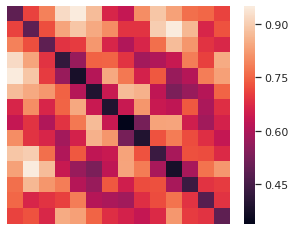

In [27]:
from scipy.ndimage.filters import gaussian_filter as gf
D = gf(RDMs[0], sigma=0.6, mode='wrap')
fig = plt.figure(figsize=(figure_size,figure_size-1))

ax = sns.heatmap(D, xticklabels=False, yticklabels=False)
ax.tick_params(labelsize=10)
ax.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)

plot_name = 'hamming_full_rdm_noise.png'
fig.savefig(os.path.join(fig_folder, plot_name), bbox_inches = "tight")

(array([28, 32, 31]), array([0.5 , 0.75, 1.  , 2.  ]))
(array([10, 39, 42]), array([0.33333333, 0.66666667, 1.        , 2.        ]))
(array([10, 18,  0,  8, 55]), array([0.  , 0.25, 0.5 , 0.75, 1.  , 2.  ]))


<Figure size 432x288 with 0 Axes>

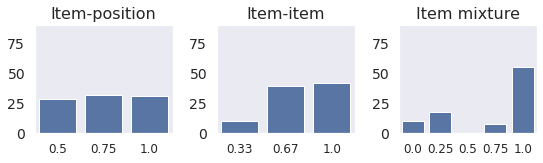

In [8]:
sns.set_style("dark");
sns.despine();

hist_kws = {"histtype": "bar", "alpha": 1}

fig = plt.figure(figsize=(9,2))
bins = [
    [1/2, 3/4, 1, 2], 
    [1/3, 2/3, 1, 2], 
    [0, 1/4, 1/2, 3/4, 1, 2], 
]

for i, s in enumerate(Scores):
    if i == 3:
        s = scale_zero_one(s)
        s = np.round(s,2)
        print(s)
    h = np.histogram(s, bins=bins[i])
    print(h)
    x = np.round(bins[i][:-1],2)
    if i == 3:
        x = np.round(bins[i][:-1],1)
    # ax = plt.subplot(len(RDMs), 1, i+1)
    ax = plt.subplot(1, len(RDMs), i+1)
    sns.barplot(x=x, y=h[0], color='b', ax=ax)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.title(Title[i], fontsize=16)
    plt.subplots_adjust(wspace = 0.32, hspace=0.5)
    ax.set_ylim([0,90])

plot_name = 'model_hist' + ext
fig.savefig(os.path.join(fig_folder, plot_name), bbox_inches = "tight")


In [9]:
a = scale_zero_one(Scores[3])
a = np.round(a,2)
h = np.histogram(a)
h

IndexError: list index out of range